In [1]:
import warnings
warnings.filterwarnings("ignore")

import readPlotOptionSurface 
import modulesForCalibration as mfc

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

#from mpl_toolkits.mplot3d import Axes3D
#from scipy import interpolate
#from scipy.stats import norm

In [2]:
# Parameters
alpha = 1.5
eta = 0.2
    
n = 12

# Model
model = 'Heston'

# risk free rate
r = 0.0245
# dividend rate
q = 0.005
# spot price
S0 = 190.3

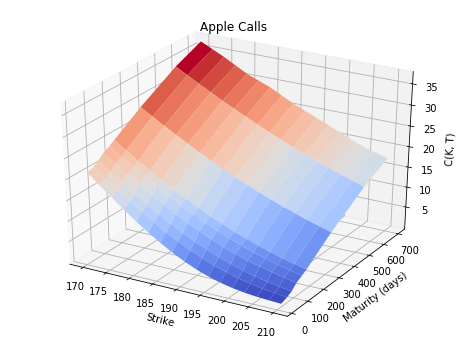

In [3]:
maturities, strikes, callPrices = readPlotOptionSurface.readNPlot()

marketPrices = callPrices
maturities_years = maturities/365.0


========================================

Grid Search around the starting point

========================================

 [ 2.3     0.046   0.0825 -0.53    0.054 ]

In [5]:
ind_iter = 1
rmseMin = 1.0e6

for kappa in mfc.myRange(1.8,2.3,0.5):
    for theta in mfc.myRange(0.036,0.046,0.01):
        for sig in mfc.myRange(0.0725,0.0925,0.01):
            for rho in mfc.myRange(-0.63,-0.53,0.1):
                for v0 in mfc.myRange(0.044,0.054,0.01):
                    params = []
                    params.append(kappa)
                    params.append(theta)
                    params.append(sig)
                    params.append(rho)
                    params.append(v0)
                    
                    print('i = ' + str(ind_iter))
                    ind_iter += 1
                    print(params)
                    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)
                    
                    if (rmse < rmseMin):
                        rmseMin = rmse
                        params2 = params
                        print('\nnew min found')
                        print(rmseMin)
                        print(params2)
                        print('')

print('\nSolution of grid search:')                        
print(params2)
print('Optimal rmse = ' + str(rmseMin))

i = 1
[1.8, 0.036, 0.0725, -0.63, 0.044]

new min found
0.7384158593600337
[1.8, 0.036, 0.0725, -0.63, 0.044]

i = 2
[1.8, 0.036, 0.0725, -0.63, 0.054]

new min found
0.6899754687630243
[1.8, 0.036, 0.0725, -0.63, 0.054]

i = 3
[1.8, 0.036, 0.0725, -0.53, 0.044]
i = 4
[1.8, 0.036, 0.0725, -0.53, 0.054]
i = 5
[1.8, 0.036, 0.08249999999999999, -0.63, 0.044]
i = 6
[1.8, 0.036, 0.08249999999999999, -0.63, 0.054]

new min found
0.6881208187225349
[1.8, 0.036, 0.08249999999999999, -0.63, 0.054]

i = 7
[1.8, 0.036, 0.08249999999999999, -0.53, 0.044]
i = 8
[1.8, 0.036, 0.08249999999999999, -0.53, 0.054]
i = 9
[1.8, 0.036, 0.09249999999999999, -0.63, 0.044]
i = 10
[1.8, 0.036, 0.09249999999999999, -0.63, 0.054]

new min found
0.6867451580823447
[1.8, 0.036, 0.09249999999999999, -0.63, 0.054]

i = 11
[1.8, 0.036, 0.09249999999999999, -0.53, 0.044]
i = 12
[1.8, 0.036, 0.09249999999999999, -0.53, 0.054]
i = 13
[1.8, 0.046, 0.0725, -0.63, 0.044]

new min found
0.379507010636429
[1.8, 0.046, 0.0725,

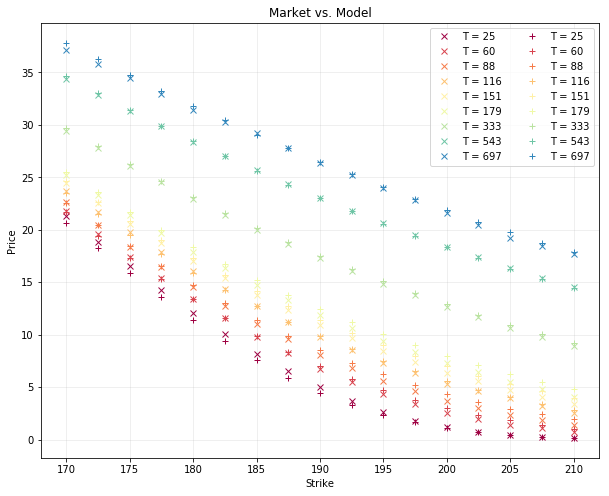

In [6]:
lenT = len(maturities)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities_years[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices[i,j] = cT_km[0]


# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
for i in range(len(maturities)):
    plt.plot(strikes, callPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model')
plt.savefig('MarketvsModel_GridSearch.png')
plt.show() 
